# Emoji Prediction

## Team Members:
    -Akshat Maheshwari (20161024)
    -Kalpit Pokra (20161134)
    -Kushagra Nagori (20161032)
    -Kartik Garg (20161219)
    
In this part of the project, we have used the word vector representations to build the emoji predictor.

The dataset we have used for this part is: [Link](https://github.com/acashmkj/twitter-sentiment-analysis/tree/master/data)

Along with that, we have used the CLDR codes of the emojis and the emoji python library to print the emoji.

In [1]:
import numpy as np
from emo_utils import *
import emoji
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
X_train, Y_train = read_csv('data/train_emoji.csv')
X_test, Y_test = read_csv('data/tess.csv')

In [3]:
maxLen = len(max(X_train, key=len).split())

In [4]:
index = 2
print(X_train[index], label_to_emoji(Y_train[index]))

It is the worst day in my life 😞


In this part, we are converting the training and testing labels into One-Hot Vectors, so that it is suitable for training the models.

In [5]:
# 24 is used, since we have 24 kinds of emojis in the emoji dictionary.

Y_oh_train = convert_to_one_hot(Y_train, C = 24)
Y_oh_test = convert_to_one_hot(Y_test, C = 24)

In [6]:
index = 50
print(Y_train[index], "is converted into one hot", Y_oh_train[index])

0 is converted into one hot [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


The first step is to convert an input sentence into the word vector representation, which then get averaged together. We will use the 50-dimensional GloVe embeddings ([Link](https://nlp.stanford.edu/projects/glove/)).

In [9]:
word_to_index, word_to_vec_map = read_glove_vecs('data/glove.6B.50d.txt')

- `word_to_index`: dictionary mapping from words to their indices in the vocabulary (400,001 words, with the valid indices ranging from 0 to 400,000)
- `word_to_vec_map`: dictionary mapping words to their GloVe vector representation.

In [10]:
def sentence_to_avg(sentence, word_to_vec_map):
    words = [word.lower() for word in sentence.split(' ') if word != '']

    avg = np.zeros(word_to_vec_map["cucumber"].shape)
    
    for w in words:
        if w in word_to_vec_map:
            avg += word_to_vec_map[w]
    avg = avg / float(len(words))
    
    return avg

In [11]:
avg = sentence_to_avg("I am a computer science student", word_to_vec_map)
print("avg = ", avg)

avg =  [-0.152426    0.36657333  0.25175683 -0.20969533  0.47594378 -0.25841217
 -0.378095   -0.40567833 -0.37233333  0.1440341   0.04078167 -0.00905833
 -0.418224    0.16384267  0.44825333  0.03722667 -0.28598     0.77520833
 -0.26075567  0.02292833  0.26706017  0.64319333  0.10002667  0.39073167
  0.66011667 -1.84776667 -0.58223    -0.32355167  0.01468667 -0.19120767
  3.09491667 -0.11282833 -0.42566167 -0.58604833 -0.168337   -0.01603667
  0.12241     0.47339833  0.53444333 -0.19619633  0.17200412 -0.1731205
 -0.1347615   0.55248033  0.08167183  0.10617     0.30711833  0.077814
  0.06971373  0.56611667]


In [12]:
def model(X, Y, word_to_vec_map, learning_rate = 0.01, num_iterations = 1000):
    train_len, num_classes, glove_dims = Y.shape[0], 24, 50
    
    W = np.random.randn(num_classes, glove_dims) / np.sqrt(glove_dims)
    b = np.zeros((num_classes,))
    
    Y_oh = convert_to_one_hot(Y, C = num_classes)
    
    for t in range(num_iterations):
        for i in range(train_len):            
            avg = sentence_to_avg(X[i], word_to_vec_map)

            a = softmax(np.dot(W, avg) + b)

            cost = -np.squeeze(np.sum(Y_oh[i] * np.log(a)))

            db = dz = a - Y_oh[i]
            dW = np.dot(dz.reshape(num_classes,1), avg.reshape(1, glove_dims))

            W, b = W - learning_rate * dW, b - learning_rate * db 
        
        if t % 100 == 0:
            print("Epoch: " + str(t) + " --- cost = " + str(cost))
            pred = predict(X, Y, W, b, word_to_vec_map)

    return pred, W, b

In [13]:
print(X_train.shape)
print(Y_train.shape)
print(np.eye(24)[Y_train.reshape(-1)].shape)

(132,)
(132,)
(132, 24)


In [14]:
pred, W, b = model(X_train, Y_train, word_to_vec_map)
print(pred)

Epoch: 0 --- cost = 1.866309779547765
Accuracy: 0.3712121212121212
Epoch: 100 --- cost = 0.07613137446687505
Accuracy: 0.9393939393939394
Epoch: 200 --- cost = 0.0424311444212482
Accuracy: 0.9621212121212122
Epoch: 300 --- cost = 0.033237271100444075
Accuracy: 0.9696969696969697
Epoch: 400 --- cost = 0.028531902664182568
Accuracy: 0.9772727272727273
Epoch: 500 --- cost = 0.025418162614515485
Accuracy: 0.9772727272727273
Epoch: 600 --- cost = 0.023087824718426707
Accuracy: 0.9772727272727273
Epoch: 700 --- cost = 0.021224203056683228
Accuracy: 0.9848484848484849
Epoch: 800 --- cost = 0.019676644001174134
Accuracy: 0.9848484848484849
Epoch: 900 --- cost = 0.01836318965797257
Accuracy: 0.9848484848484849
[[3.]
 [2.]
 [3.]
 [0.]
 [4.]
 [0.]
 [3.]
 [2.]
 [3.]
 [1.]
 [3.]
 [3.]
 [1.]
 [3.]
 [2.]
 [3.]
 [2.]
 [3.]
 [1.]
 [2.]
 [3.]
 [0.]
 [2.]
 [2.]
 [2.]
 [1.]
 [4.]
 [3.]
 [2.]
 [4.]
 [0.]
 [3.]
 [4.]
 [2.]
 [0.]
 [3.]
 [2.]
 [2.]
 [3.]
 [4.]
 [2.]
 [2.]
 [0.]
 [2.]
 [3.]
 [0.]
 [3.]
 [2.]
 

In [15]:
# Run the model on the training and the test set

print("Training set:")
pred_train = predict(X_train, Y_train, W, b, word_to_vec_map)
print('Test set:')
pred_test = predict(X_test, Y_test, W, b, word_to_vec_map)

Training set:
Accuracy: 0.9848484848484849
Test set:
Accuracy: 0.875


Now random guessing on some sentences and checking it's validity manually

In [16]:
X_my_sentences = np.array(["i adore you", "i love you", "funny lol", "lets play with a ball", "food is ready", "not feeling happy"])
Y_my_labels = np.array([[0], [0], [2], [1], [4],[3]])

pred = predict(X_my_sentences, Y_my_labels , W, b, word_to_vec_map)
print_predictions(X_my_sentences, pred)

Accuracy: 1.0

i adore you ❤
i love you ❤
funny lol 😄
lets play with a ball ⚾
food is ready 🍴
not feeling happy 😞


(56,)
           ❤    ⚾    😄    😞   🍴
Predicted  0.0  1.0  2.0  3.0  4.0  All
Actual                                 
0            6    0    0    1    0    7
1            0    8    0    0    0    8
2            1    0   16    2    0   19
3            1    1    1   12    0   15
4            0    0    0    0    7    7
All          8    9   17   15    7   56


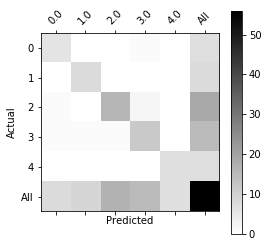

In [17]:
print(Y_test.shape)
print('           '+ label_to_emoji(0)+ '    ' + label_to_emoji(1) + '    ' +  label_to_emoji(2)+ '    ' + label_to_emoji(3)+'   ' + label_to_emoji(4))
print(pd.crosstab(Y_test, pred_test.reshape(56,), rownames=['Actual'], colnames=['Predicted'], margins=True))
plot_confusion_matrix(Y_test, pred_test)

In [18]:
sent = np.array(["I told you not to do that thing", "I love you", "I am mad at you", "i am very cheerful"])
pred = predict1(sent, W, b, word_to_vec_map)

print_predictions(sent, pred)

I told you not to do that thing [3.]
I love you [0.]
I am mad at you [3.]
i am very cheerful [2.]

I told you not to do that thing 😞
I love you ❤
I am mad at you 😞
i am very cheerful 😄


## Predicting Emojis for a sentence using LSTM

LSTM is Long-Short-Term-Memory. As the name suggests, it takes into account the previous memory of the sequential flow of the input (sentence in this case). Now, due to this memory property, LSTM can be used for Sentiment Analysis.

In [19]:
import numpy as np
# np.random.seed(0)
from keras.models import Model, Sequential
from keras.layers import Dense, Input, Dropout, LSTM, Activation
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from keras.initializers import glorot_uniform
np.random.seed(1)

Using TensorFlow backend.


In [20]:
def sentences_to_indices(X, word_to_index, max_len):
    num_train = X.shape[0]
    
    X_indices = np.zeros((num_train, max_len))
    
    for i in range(num_train):
        words = X[i].split(' ')
        
        
        sentence_words = [word.lower().replace('\t', '') for word in words if word.replace('\t', '') != '']
        
        j = 0
        
        for w in sentence_words:
            X_indices[i, j] = word_to_index[w]
            j += 1
    
    return X_indices

In [21]:
X1 = np.array(["funny lol", "lets play baseball", "food is ready for you"])
X1_indices = sentences_to_indices(X1,word_to_index, max_len = 24)
print("X1 =", X1)
print("X1_indices =", X1_indices)

X1 = ['funny lol' 'lets play baseball' 'food is ready for you']
X1_indices = [[155345. 225122.      0.      0.      0.      0.      0.      0.      0.
       0.      0.      0.      0.      0.      0.      0.      0.      0.
       0.      0.      0.      0.      0.      0.]
 [220930. 286375.  69714.      0.      0.      0.      0.      0.      0.
       0.      0.      0.      0.      0.      0.      0.      0.      0.
       0.      0.      0.      0.      0.      0.]
 [151204. 192973. 302254. 151349. 394475.      0.      0.      0.      0.
       0.      0.      0.      0.      0.      0.      0.      0.      0.
       0.      0.      0.      0.      0.      0.]]


In [22]:
def pretrained_embedding_layer(word_to_vec_map, word_to_index):
    vocab_len, emb_dim = len(word_to_index) + 1, 50
    
    emb_matrix = np.zeros((vocab_len, emb_dim))
    
    for word, index in word_to_index.items():
        emb_matrix[index, :] = word_to_vec_map[word]

    embedding_layer = Embedding(vocab_len, emb_dim, trainable=False)
    embedding_layer.build((None,))
    
    embedding_layer.set_weights([emb_matrix])
    
    return embedding_layer

In [23]:
def Emojify_V2(input_shape, word_to_vec_map, word_to_index):    
    sentence_indices = Input(shape=input_shape, dtype='int32')
    
    embedding_layer = pretrained_embedding_layer(word_to_vec_map, word_to_index)
    
    embeddings = embedding_layer(sentence_indices)
    
    X = LSTM(256, return_sequences=True)(embeddings)
    X = Dropout(0.5)(X)

    X = LSTM(128, return_sequences=False)(X)
    X = Dropout(0.5)(X)

    X = Dense(24, activation=None)(X)
    X = Activation('softmax')(X)
    
    model = Model(inputs=[sentence_indices], outputs=X)
    
    return model

In [24]:
model = Emojify_V2((maxLen,), word_to_vec_map, word_to_index)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 10)                0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 10, 50)            20000050  
_________________________________________________________________
lstm_1 (LSTM)                (None, 10, 256)           314368    
_________________________________________________________________
dropout_1 (Dropout)          (None, 10, 256)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 128)               197120    
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 24)                3096      
__________

In [25]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [26]:
X_train_indices = sentences_to_indices(X_train, word_to_index, maxLen)
Y_train_oh = convert_to_one_hot(Y_train, C = 24)

In [27]:
model.fit(X_train_indices, Y_train_oh, epochs = 200, batch_size = 32, shuffle=True)

Epoch 1/200
132/132 [==============================] - 3s 20ms/step - loss: 2.9748 - acc: 0.2652
Epoch 2/200
132/132 [==============================] - 0s 1ms/step - loss: 2.2014 - acc: 0.2879
Epoch 3/200
132/132 [==============================] - 0s 1ms/step - loss: 1.8438 - acc: 0.2652
Epoch 4/200
132/132 [==============================] - 0s 1ms/step - loss: 1.8213 - acc: 0.1970
Epoch 5/200
132/132 [==============================] - 0s 1ms/step - loss: 1.6975 - acc: 0.2348
Epoch 6/200
132/132 [==============================] - 0s 1ms/step - loss: 1.7122 - acc: 0.3106
Epoch 7/200
132/132 [==============================] - 0s 1ms/step - loss: 1.6701 - acc: 0.2803
Epoch 8/200
132/132 [==============================] - 0s 1ms/step - loss: 1.6388 - acc: 0.2652
Epoch 9/200
132/132 [==============================] - 0s 2ms/step - loss: 1.5227 - acc: 0.3258
Epoch 10/200
132/132 [==============================] - 0s 2ms/step - loss: 1.3812 - acc: 0.3788
Epoch 11/200
132/132 [================

132/132 [==============================] - 0s 2ms/step - loss: 0.0399 - acc: 1.0000
Epoch 86/200
132/132 [==============================] - 0s 2ms/step - loss: 0.0412 - acc: 0.9924
Epoch 87/200
132/132 [==============================] - 0s 2ms/step - loss: 0.0221 - acc: 1.0000
Epoch 88/200
132/132 [==============================] - 0s 2ms/step - loss: 0.0194 - acc: 1.0000
Epoch 89/200
132/132 [==============================] - 0s 2ms/step - loss: 0.0156 - acc: 1.0000
Epoch 90/200
132/132 [==============================] - 0s 2ms/step - loss: 0.0150 - acc: 1.0000
Epoch 91/200
132/132 [==============================] - 0s 2ms/step - loss: 0.0088 - acc: 1.0000
Epoch 92/200
132/132 [==============================] - 0s 2ms/step - loss: 0.0097 - acc: 1.0000
Epoch 93/200
132/132 [==============================] - 0s 2ms/step - loss: 0.0102 - acc: 1.0000
Epoch 94/200
132/132 [==============================] - 0s 2ms/step - loss: 0.0076 - acc: 1.0000
Epoch 95/200
132/132 [=====================

132/132 [==============================] - 0s 2ms/step - loss: 0.0018 - acc: 1.0000
Epoch 169/200
132/132 [==============================] - 0s 2ms/step - loss: 0.0017 - acc: 1.0000
Epoch 170/200
132/132 [==============================] - 0s 2ms/step - loss: 0.0025 - acc: 1.0000
Epoch 171/200
132/132 [==============================] - 0s 2ms/step - loss: 0.0010 - acc: 1.0000
Epoch 172/200
132/132 [==============================] - 0s 2ms/step - loss: 0.0013 - acc: 1.0000
Epoch 173/200
132/132 [==============================] - 0s 2ms/step - loss: 0.0011 - acc: 1.0000
Epoch 174/200
132/132 [==============================] - 0s 2ms/step - loss: 0.0013 - acc: 1.0000
Epoch 175/200
132/132 [==============================] - 0s 2ms/step - loss: 0.0013 - acc: 1.0000
Epoch 176/200
132/132 [==============================] - 0s 2ms/step - loss: 0.0013 - acc: 1.0000
Epoch 177/200
132/132 [==============================] - 0s 2ms/step - loss: 0.0012 - acc: 1.0000
Epoch 178/200
132/132 [===========

In [28]:
X_test_indices = sentences_to_indices(X_test, word_to_index, max_len = maxLen)
Y_test_oh = convert_to_one_hot(Y_test, C = 24)
loss, acc = model.evaluate(X_test_indices, Y_test_oh)
print()
print("Test accuracy = ", acc)

56/56 [==============================] - 0s 6ms/step

Test accuracy =  0.8392857228006635


In [29]:
# Change the sentence below to see your prediction. Make sure all the words are in the Glove embeddings.  
x_test = np.array(['not feeling happy', 'i am hungry', 'I love you', 'i adore you', "funny lol", "lets play with a ball", "food is ready"])
X_test_indices = sentences_to_indices(x_test, word_to_index, maxLen)

# pred = np

# print(X_test_indices.shape)

# for i in range(len(x_test)):
#     print(x_test[i] +' '+  label_to_emoji(np.argmax(model.predict(X_test_indices[i]))))
    
pred = model.predict(X_test_indices)
for i in range(len(x_test)):
    x = X_test_indices
    num = np.argmax(pred[i])
#     if(num != Y_test[i]):
    print('prediction: '+ x_test[i] + label_to_emoji(num).strip())

prediction: not feeling happy😞
prediction: i am hungry🍴
prediction: I love you❤
prediction: i adore you❤
prediction: funny lol😄
prediction: lets play with a ball⚾
prediction: food is ready🍴
